# Breed differences of heritable behaviour traits in cats

## Intro

Since I come from a family who likes pets, I decided to analyze data related to dog or cat breeds. I used PMC in NCBI to find an interesting [article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6538663/), where the authors have provided the [data](https://figshare.com/articles/Salonen_et_al_Breed_differences_of_heritable_behaviour_traits_in_cats_-_data/8143835). 

When doing a comprehensive animal breed comparison the only way to generate a large amount of data is using questionnaires, therefore the data is not 100% reliable as the method of gathering it can not be validated. However, some researchers<sup>1, 2</sup> suggest that questionnaires ar as valid as behavioral tests.

The data set consists of 5726 observations, and 21 variables, there are some missing values - probably where there was no answer given.




In [89]:
import pandas as pd
print('Pandas imported successfully, version: '+pd.__version__)
import statsmodels as sm
print('Statsmodels imported successfully, version: '+sm.__version__)
import plotly
print('Plotly imported successfully, version: '+plotly.__version__)
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Pandas imported successfully, version: 0.25.2
Statsmodels imported successfully, version: 0.10.1
Plotly imported successfully, version: 4.3.0


## Data import

In [90]:
raw_data = pd.read_excel("https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/15177200/publisheddatascientificreports.xlsx")


In [91]:
data = raw_data.iloc[:, 1:-3]
data.Gender.replace([1, 2], ['Male', 'Female'], inplace = True)
data.dropna(how = 'any', inplace = True)


We can see that the data imported successfully. The authors also added 3 personality components from some of the traits listed, since I wanted to work with a raw dataset these were removed by removing the last 3 columns. 


### Description of raw data

The data was collected conducting a survey directed to cat owners and a 
breed-wise comparison of feline behaviour with over 5700 cats in 19 breeds and 
breed groups. 

### Codebook of raw data

The description of variables with units of measurement.

* **ID_number** - the identification number of a cat.

* **Age** - age of a cat at the time of the survey.

* **Gender** - male (1) or female (2).

* **Neuter_status** - indicates if a cat is neutered (1) or not (2).

* **Breed_group** - a three letter code indicating the breed of a cat.

* **Weaning_age** - indicates the age at which a cat is weaned.

* **Outdoors** - shows how much time a cat relatively spends outdoors: 
from 0 to 5, 0 means that the cat doesn't go outside, 5 - the cat spends 
the most time outdoors.

* **Other_cats** - shows if there are any other cats in the household (1) 
or if it is the only animal (0).

* **Activity_level** - shows the activity level of a cat: from 1 to 5, 5 being 
the most active.

* **Contact_people** - shows how much contact with people a cat has: 
from 1 to 5, 5 indicates the highest level of contact.

* **Aggression_stranger** - shows how aggressive a cat is towards strangers: 
from 1 to 5, 5 being the most aggressive.

* **Aggression_owner** - shows how aggressive a cat is towards its owner: 
from 1 to 5, 5 being the most aggressive.

* **Aggression_cats** - shows how aggressive a cat is towards other cats: 
from 1 to 5, 5 being the most aggressive.

* **Shyness_novel** - indicates a cat's shyness towards novel objects: from 1 to 5, 5 being the
most shy.

* **Shyness_strangers** - indicates a cat's shyness towards strangers: 
from 1 to 5, 5 being the
most shy.

* **Grooming** - shows how much a cat grooms itself: from 1 to 5, 
5 indicates the highest level of grooming.

* **Wool_sucking** - indicates how much a cat sucks wool: from 0 to 7, 
0 indicates that the cat does not suck wool, 7 - performs wool sucking the most. 

* **Behaviour_problem** - shows the level of behavioural problems in a cat: 
from 0 to 3: 0 indicates that a cat does not have behavioural problems, 
3 - indicates the highest level of behavioural problems.




## Descriptive statistics

The are 17 different variables in this data set, Table 1 describes some statstics for each variable. Table 2 lists each variable type, dispersion and central tendecy.

**Table 1**

In [92]:
data.describe(include = 'all') 

,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem
count,5648.000000,5648,5648.000000,5648,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
unique,NaN,2,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,NaN,HCS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3051,NaN,829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.749807,NaN,0.779214,NaN,4.618803,2.545680,0.847557,3.769299,4.088527,1.116856,1.097203,1.582330,2.025673,1.885446,1.794972,0.912358,1.070999
std,3.769289,NaN,0.414813,NaN,1.574786,1.910713,0.359482,0.865938,0.878661,0.419313,0.369656,0.838438,0.996654,1.052785,0.999077,1.543285,0.385805
min,0.167100,NaN,0.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.780125,NaN,1.000000,NaN,4.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
50%,3.876700,NaN,1.000000,NaN,4.000000,2.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000
75%,6.781500,NaN,1.000000,NaN,5.000000,5.000000,1.000000,4.000000,5.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000


In [93]:

#Continous
print("%.3f" % data.Age.mean())
print("%.3f" % data.Age.std(), '\n')

#Nominal types
print(data.Gender.mode(), '\n')

print(data.Neuter_status.mode(), '\n')

print(data.Breed_group.mode(), '\n')

print(data.Other_cats.mode())


## All other data types are ordinal so:
print(data.median())
print((data.quantile(1) - data.quantile(0)), '\n')



4.750
3.769 

0    Female
dtype: object 

0    1
dtype: int64 

0    HCS
dtype: object 

0    1
dtype: int64
Age                    3.8767
Neuter_status          1.0000
Weaning_age            4.0000
Outdoors               2.0000
Other_cats             1.0000
Activity_level         4.0000
Contact_people         4.0000
Aggression_stranger    1.0000
Aggression_owner       1.0000
Aggression_cats        1.0000
Shyness_novel          2.0000
Shyness_strangers      2.0000
Grooming               1.0000
Wool_sucking           0.0000
Behaviour_problem      1.0000
dtype: float64
Age                    24.6439
Neuter_status           1.0000
Weaning_age             7.0000
Outdoors                5.0000
Other_cats              1.0000
Activity_level          4.0000
Contact_people          4.0000
Aggression_stranger     4.0000
Aggression_owner        4.0000
Aggression_cats         4.0000
Shyness_novel           4.0000
Shyness_strangers       4.0000
Grooming                4.0000
Wool_sucking           

**Table 2**

| Variable | Type | Mean | Median | Mode | SD | Range |
| --- | --- | --- | --- | --- | --- | --- |
| Age | Continous| 4.753 | - | - | 3.769 | - |
| Gender | Nominal| - | - | Female |  - | - |
| Neuter status | Nominal | - | - | 1 | - | - |
| Breed group | Nominal | - | - | HCS | - | - |
| Weaning age | Ordinal| - | 4 | - | - | 7 |
| Outdoors | Ordinal | - | 2 | - | - | 4 |
| Other cats | Nominal| - | - | 1 | - | - |
| Activity level | Ordinal| - | 4 | - | - | 4 |
| Contact people | Ordinal| - | 4 | - | - | 4 |
| Agression stranger | Ordinal| - | 1 | - | - | 4 |
| Aggresion owner | Ordinal| - | 1 | - | - | 4 |
| Agression cats | Ordinal| - | 1 | - | - | 4 |
| Shyness novel | Ordinal| - | 2 | - | - | 4 |
| Shyness strangers | Ordinal| - | 2 | - | - | 4|
| Grooming | Ordinal| - | 1 | - | - | 4 |
| Wool sucking | Ordinal| - | 0 | - | - | 7 |
| Behavior problem | Ordinal| - | 1 | - | - | 3 |




## Analysis
I wanted to do analysis based on wether a cat is purebreed or not (housecat). For this purpose another logical observation Purebred was created. Then we perform a Welch's t-test to check whether there is an age difference between the two groups.

### T-testing

In [94]:
data['Purebred'] = [False if x == 'HCS' else True for x in data['Breed_group']]

ttest_ind(*data.groupby('Purebred')['Age'].apply(lambda x:list(x)),  equal_var=False)





Ttest_indResult(statistic=8.668338853012461, pvalue=1.674091708850819e-17)

Our p-value is less than <0.001, so we can say that the age difference is statistically significant between these two groups. The difference is also shown in the violin plot below. However, since the data is from a questionnaire and more importantly it represents the age (but not life expectancy) we can't draw much conclusion from this.

In [95]:
age_violin = px.violin(data, y='Age', color='Purebred',
                violinmode='overlay')
age_violin.show()

### PCA
I also tried to do PCA using python, as we can see  below there are 11 principal components that account for 95% of variance.

array([0.19752966, 0.13587739])

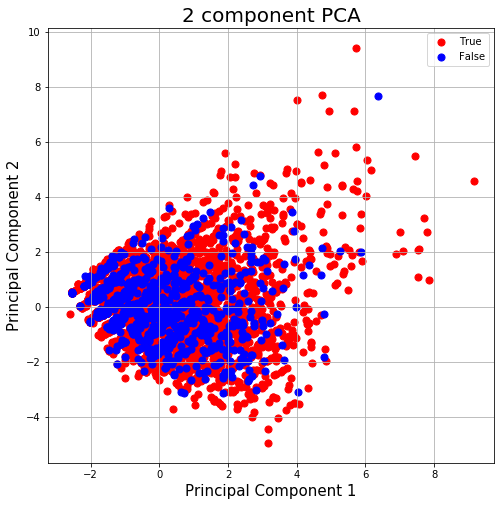

In [96]:
pca_features = ['Weaning_age', 'Outdoors', 'Activity_level', 'Contact_people',
                'Aggression_stranger', 'Aggression_owner', 'Aggression_cats',
                'Shyness_novel','Shyness_strangers', 'Grooming', 'Wool_sucking',
                'Behaviour_problem']

pca_x = data.loc[:, pca_features]
pca_y = data.loc[:,['Purebred']]


pca_x = StandardScaler().fit_transform(pca_x) #standartising the data

pca_all = PCA(n_components = 2)
principalComponents = pca_all.fit_transform(pca_x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, data[['Purebred']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Purebred'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

pca_all.explained_variance_ratio_


As we can see from the graph, the first two components do not contain enough information to show the difference between mixed breed and purebred cats.
We can also split the data into three categories and get components for each category, just like the authors did in the article
#### Agression component

array([0.57059933, 0.26031307, 0.16908759])

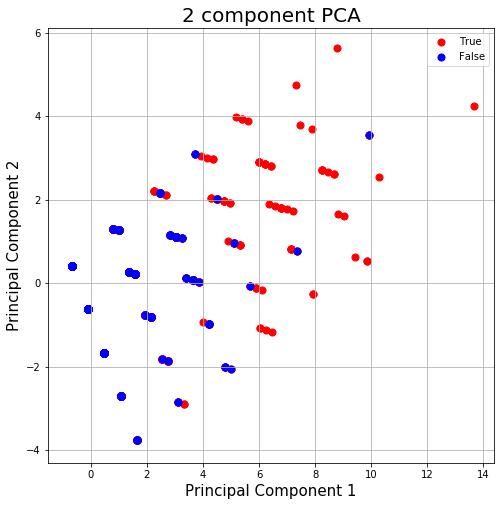

In [97]:
aggr_f = ['Aggression_stranger', 'Aggression_owner', 'Aggression_cats']
pca_aggr = StandardScaler().fit_transform(data.loc[:, aggr_f])

pca_a = PCA(0.95)

principalComponents_aggr = pca_a.fit_transform(pca_aggr)

principalDf_aggr = pd.DataFrame(data = principalComponents_aggr[:,0:2]
             , columns = ['principal component 1', 'principal component 2'])

finalDf_aggr = pd.concat([principalDf_aggr, data[['Purebred']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_aggr['Purebred'] == target
    ax.scatter(finalDf_aggr.loc[indicesToKeep, 'principal component 1']
               , finalDf_aggr.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


pca_a.explained_variance_ratio_

#### Shyness component

array([0.86890076, 0.13109924])

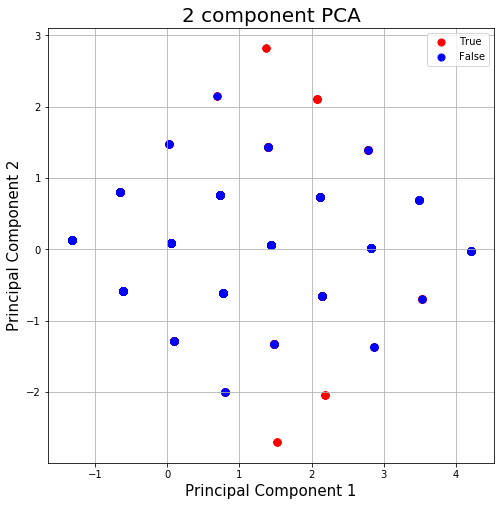

In [98]:
shy_f = ['Shyness_novel','Shyness_strangers']
pca_shy = StandardScaler().fit_transform(data.loc[:, shy_f])

pca_s = PCA(0.95)
principalComponents_shy = pca_s.fit_transform(pca_shy)

principalDf_shy = pd.DataFrame(data = principalComponents_shy
             , columns = ['principal component 1', 'principal component 2'])

finalDf_shy = pd.concat([principalDf_shy, data[['Purebred']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_shy['Purebred'] == target
    ax.scatter(finalDf_shy.loc[indicesToKeep, 'principal component 1']
               , finalDf_shy.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


pca_s.explained_variance_ratio_

#### Extraversion component

array([0.72195996, 0.27804004])

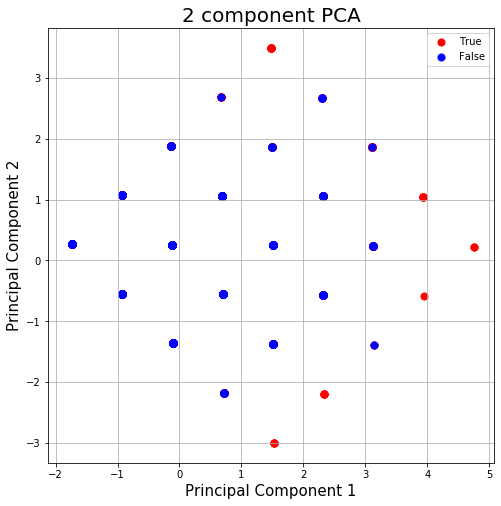

In [99]:
extra_f = ['Activity_level', 'Contact_people']
pca_extra = StandardScaler().fit_transform(data.loc[:, extra_f])

pca_e = PCA(0.95)
principalComponents_extra = pca_e.fit_transform(pca_extra)

principalDf_extra = pd.DataFrame(data = principalComponents_extra
             , columns = ['principal component 1', 'principal component 2'])

finalDf_extra = pd.concat([principalDf_extra, data[['Purebred']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf_extra['Purebred'] == target
    ax.scatter(finalDf_extra.loc[indicesToKeep, 'principal component 1']
               , finalDf_extra.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


pca_e.explained_variance_ratio_

We can see from the graphs, using likert scale data in PCA produces interesting results and only the aggression type variables produce components that help differntiate between purebred and mixed breed cats.

### Machine learning
In the end I tried to do machine learning with python, since I already used mlr with this dataset it would be interesting for me to compare the results, I am going to try a classifaction algorythm to predict wether a cat is purebred.

First of all we can remove some variables from our data frame that have no impact when considering breed.


In [100]:
ml_features = ['Weaning_age', 'Outdoors', 'Activity_level', 'Contact_people',
                'Aggression_stranger', 'Aggression_owner', 'Aggression_cats',
                'Shyness_novel','Shyness_strangers', 'Grooming', 'Wool_sucking',
                'Behaviour_problem', 'Purebred']
ml_data = data.loc[:, ml_features]


Mean missclassifcation error (mmce): 0.17864806866952787


Next we should create training and testing sets and then a classification object, we are using tree classification here

In [ ]:
ml_x = ml_data.iloc[:,0:-1]

ml_y = ml_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(ml_x,ml_y,test_size = 0.33)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)


Finally we can predict our test set results, and make a confusion matrix. Then we  can calculate the mean missclassification error.

In [102]:
pred = clf.predict(x_test)
conf = confusion_matrix(y_test,pred)
mmce = 1 - (conf.trace())/conf.sum()
print('Mean missclassifcation error (mmce):', mmce)

Mean missclassifcation error (mmce): 0.17864806866952787


As mentioned before I carried out a machine learning analsys on R also. I used 4 algorythms there (xgboost, adaboost, rpart, random forest) and their mmces ranged from 0.015 to 0.018 so the results of doing machine learning in scikit-learn or mlr are very simillar.

### References
1. Yukihide Momozawa et al. Assessment of equine temperament by a questionnaire survey to caretakers and evaluation of its reliability by simultaneous behavior test https://doi.org/10.1016/j.applanim.2003.08.001
2. Erik Wilsson and David L.Sinn. Are there differences between behavioral measurement methods? A comparison of the predictive validity of two ratings methods in a working dog program https://doi.org/10.1016/j.applanim.2012.08.012